<a href="https://colab.research.google.com/github/Ksenyakin/MO/blob/main/ind2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузить датасет Adult.csv


In [3]:
import pandas as pd

data = pd.read_csv('adult.csv')
data


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2. Проверить наличие пропущенных значений в данных и заполнить их при необходимости.

In [2]:
import numpy as np

data.replace('?', np.nan, inplace=True)
print(data.isnull().sum())



age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [4]:
for column in ['workclass', 'occupation', 'native-country']:
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True)

print(data.isnull().sum())

print(data.dtypes)


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


<ipython-input-4-412999ee14c0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode, inplace=True)


3. Преобразовать категориальные признаки в числовые значения с помощью кодирования, например, с помощью метода One-Hot Encoding.

In [5]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('income')

data_encoded = pd.get_dummies(data, columns=categorical_columns)

data_encoded['income'] = data_encoded['income'].map({'<=50K': 0, '>50K': 1})

4. Масштабировать числовые признаки, например, с помощью метода StandardScaler




In [8]:
from sklearn.preprocessing import StandardScaler
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('income')

scaler = StandardScaler()

data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

print("Первые 5 строк масштабированных числовых признаков:")
print(data_encoded[numeric_columns].head())
print(data.dtypes)


Первые 5 строк масштабированных числовых признаков:
        age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -0.995129  0.351675        -1.197259     -0.144804     -0.217127   
1 -0.046942 -0.945524        -0.419335     -0.144804     -0.217127   
2 -0.776316  1.394723         0.747550     -0.144804     -0.217127   
3  0.390683 -0.277844        -0.030373      0.886874     -0.217127   
4 -1.505691 -0.815954        -0.030373     -0.144804     -0.217127   

   hours-per-week  
0       -0.034087  
1        0.772930  
2       -0.034087  
3       -0.034087  
4       -0.841104  
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


5. Разделить данные на обучающую и тестовую выборки.




In [9]:
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



6. Построить диаграмму для отображения баланса классов в целевой переменной (зарабатывает более 50 тыс. долларов в год или нет).



<ipython-input-13-fa53babbfd73>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['<=50K', '>50K'])


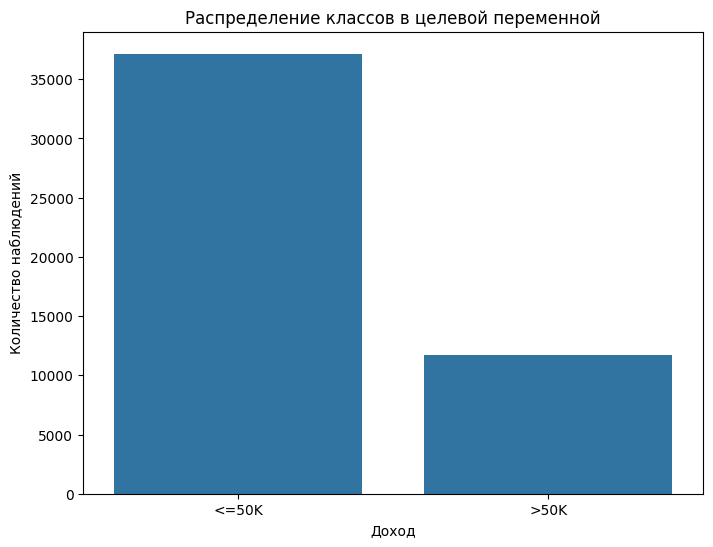

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

ax = sns.countplot(x='income', data=data_encoded)

ax.set_xticklabels(['<=50K', '>50K'])

plt.title('Распределение классов в целевой переменной')
plt.xlabel('Доход')
plt.ylabel('Количество наблюдений')

total = len(data_encoded)


plt.show()


7. Построить матрицу корреляции между числовыми признаками для выявления возможной зависимости между ними.

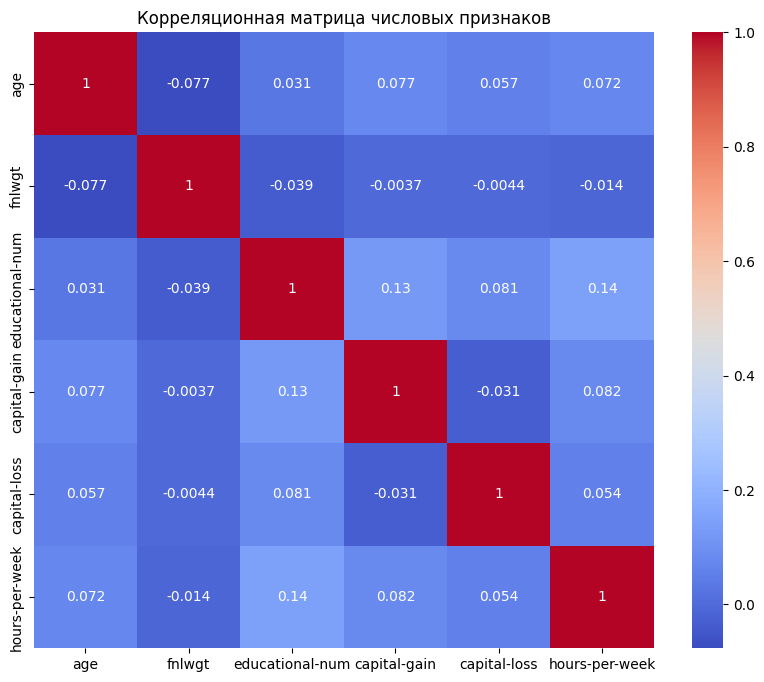

In [16]:
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr_matrix = data_encoded[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()


8. Построить гистограмму распределения возраста в зависимости от значения целевой переменной.

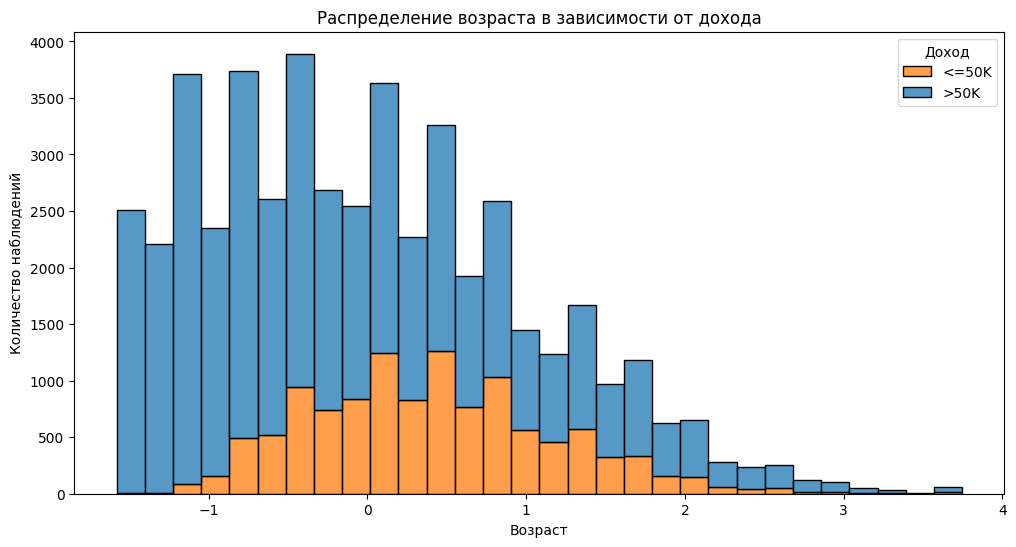

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(data=data_encoded, x='age', hue='income', bins=30, multiple='stack')

plt.xlabel('Возраст')
plt.ylabel('Количество наблюдений')

plt.legend(title='Доход', labels=['<=50K', '>50K'])

plt.title('Распределение возраста в зависимости от дохода')

plt.show()




9. Выбрать алгоритм классификации, например, Random Forest.
10. Обучить модель на обучающей выборке и оценить ее точность на тестовой выборке с помощью метрик, таких как Accuracy, Precision, Recall, F1-score.

Accuracy (Точность): 0.8570
Precision (Точность позитивных предсказаний): 0.7373
Recall (Полнота): 0.6253
F1-score: 0.6767

Classification Report (Отчет по классификации):
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7431
        >50K       0.74      0.63      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769


Confusion Matrix (Матрица ошибок):
[[6910  521]
 [ 876 1462]]


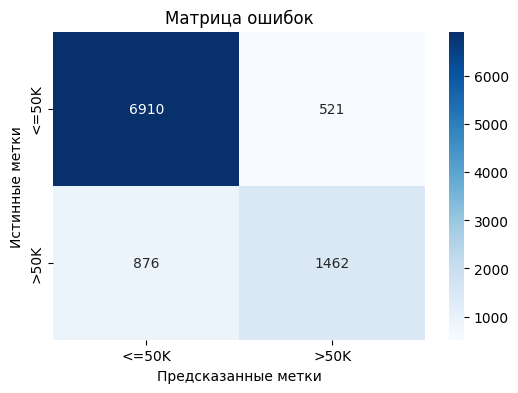

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Точность): {accuracy:.4f}")
precision = precision_score(y_test, y_pred)
print(f"Precision (Точность позитивных предсказаний): {precision:.4f}")
repecall = recall_score(y_test, y_pred)
print(f"Recall (Полнота): {repecall:.4f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")
print("\nClassification Report (Отчет по классификации):")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Матрица ошибок):")
print(cm)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


11. Оценить важность признаков с помощью алгоритма и вывести их значения в виде
графика

Топ-10 наиболее важных признаков:
                              Признак  Важность
1                              fnlwgt  0.168006
0                                 age  0.153862
3                        capital-gain  0.089830
5                      hours-per-week  0.083372
33  marital-status_Married-civ-spouse  0.069051
2                     educational-num  0.068549
53               relationship_Husband  0.043186
4                        capital-loss  0.030101
35       marital-status_Never-married  0.019499
42         occupation_Exec-managerial  0.018739


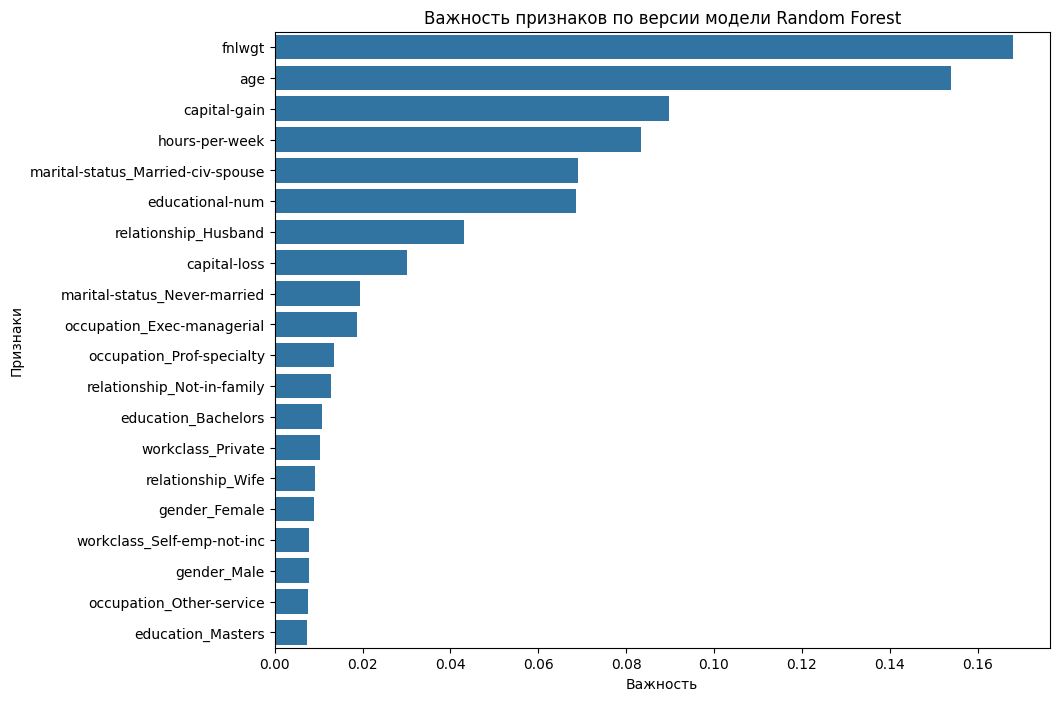

In [18]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Признак': feature_names, 'Важность': importances})
feature_importances = feature_importances.sort_values(by='Важность', ascending=False)

print("Топ-10 наиболее важных признаков:")
print(feature_importances.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importances.head(20))
plt.title('Важность признаков по версии модели Random Forest')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()


12. Применить метод GridSearchCV для поиска оптимальных гиперпараметров модели


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Лучшие параметры, найденные GridSearchCV:
{'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy (Точность) лучшей модели: 0.8692
F1-score лучшей модели: 0.6973

Отчёт по классификации:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7431
        >50K       0.78      0.63      0.70      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769


Confusion Matrix (Матрица ошибок):
[[7019  412]
 [ 866 1472]]


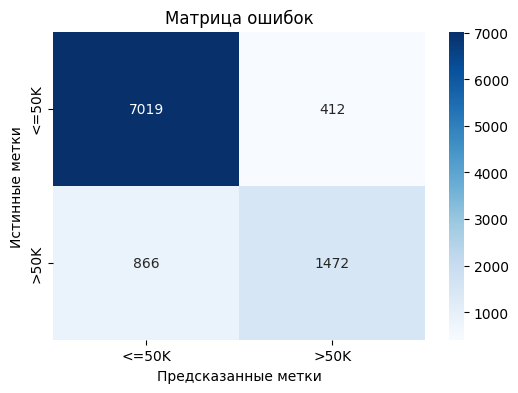

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры, найденные GridSearchCV:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Метрики
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy (Точность) лучшей модели: {accuracy:.4f}")
print(f"F1-score лучшей модели: {f1:.4f}")

print("\nОтчёт по классификации:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Матрица ошибок):")
print(cm)

# График матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица ошибок')
plt.show()


13. Повторить шаги 9-12 для других алгоритмов классификации и сравнить их между собой


Random Forest - Confusion Matrix (Матрица ошибок):
[[6910  521]
 [ 876 1462]]


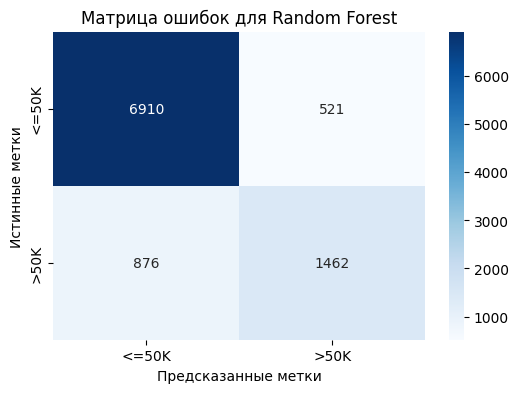


Logistic Regression - Confusion Matrix (Матрица ошибок):
[[6949  482]
 [ 944 1394]]


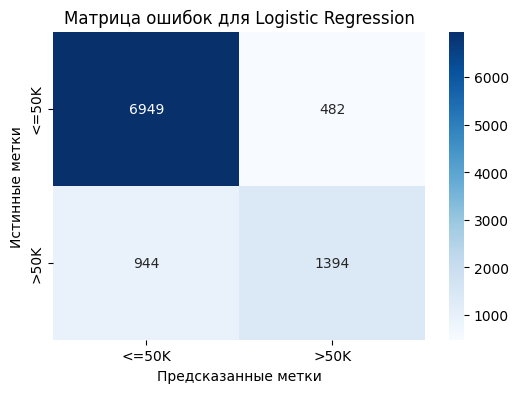


SVM - Confusion Matrix (Матрица ошибок):
[[7023  408]
 [ 945 1393]]


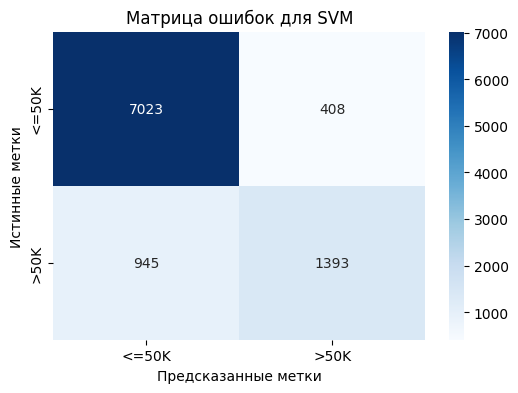


Gradient Boosting - Confusion Matrix (Матрица ошибок):
[[7075  356]
 [ 923 1415]]


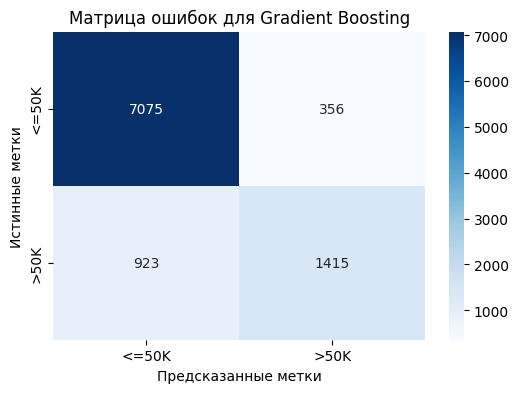


Random Forest: {'Accuracy': 0.8569966219674481, 'Precision': 0.7372667675239536, 'Recall': 0.6253207869974337, 'F1 Score': 0.6766952094422587}

Logistic Regression: {'Accuracy': 0.8540280479066434, 'Precision': 0.7430703624733476, 'Recall': 0.5962360992301112, 'F1 Score': 0.6616041765543427}

SVM: {'Accuracy': 0.8615006653700481, 'Precision': 0.773459189339256, 'Recall': 0.5958083832335329, 'F1 Score': 0.6731094467262624}

Gradient Boosting: {'Accuracy': 0.8690756474562391, 'Precision': 0.7989836250705816, 'Recall': 0.605218135158255, 'F1 Score': 0.6887320515940618}


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Словарь для хранения моделей
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} - Confusion Matrix (Матрица ошибок):")
    print(cm)

    # График матрицы ошибок
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.show()

# Вывод результатов
for model_name, metrics in results.items():
    print(f"\n{model_name}: {metrics}")


14. Выбрать лучшую модель и сделать предсказание на новых данных

In [24]:
best_model_name = max(results, key=lambda x: results[x]['F1 Score'])
best_model = models[best_model_name]
print(best_model_name)


Gradient Boosting
